# Seaborn
Matplotlib is not designed for use with Pandas dataframes. In order to visualize data from a Pandas dataframe, you must extract each series and often concatenate these series’ together into the right format.

Seaborn provides an API on top of matplotlib which uses sane plot & color defaults, uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes

## Import packages

In [1]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt

# Importing Pandas
import pandas as pd

#Import Warnings
import warnings

# Seaborn for plotting and styling
import seaborn as sns

#Fixed size for all plots
plt.rcParams['figure.figsize']=12,8

warnings.filterwarnings('ignore')

## Color Palettes and Style

In [2]:
# Default settings
# sns.set()
sns.set(style="darkgrid")

In [3]:
car_dataset_url ='https://raw.githubusercontent.com/ankitind/sample_datasets/master/car_ad.csv'
car_ads = pd.read_csv(car_dataset_url)


In [4]:
len(car_ads)


9576

In [5]:
car_ads.columns = ['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive']

In [6]:
car_ads.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

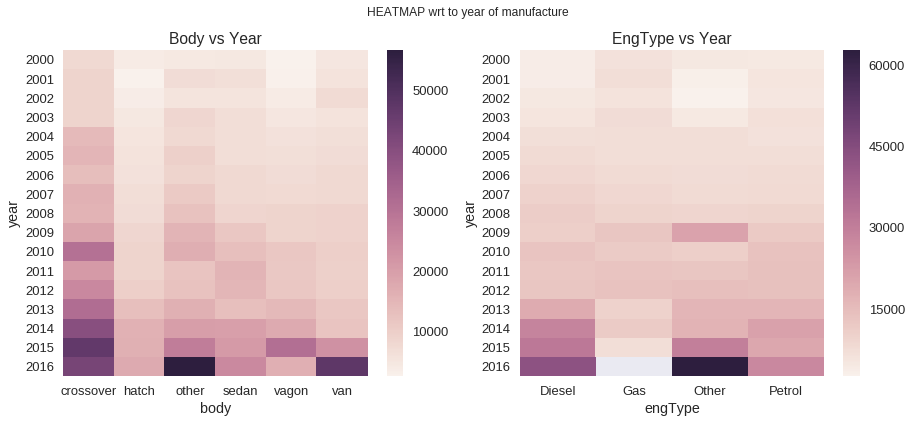

In [61]:
#print(car_ads.head())
c1 = car_ads[car_ads.year > 1999]
c1.dropna

b1 = c1[['body', 'year', 'price']]
b2 = b1.groupby([ 'year', 'body']).median()
b2.dropna()
b2 = b2.reset_index()
b = b2.pivot(index="year", columns="body", values="price")



b11 = c1[['engType', 'year', 'price']]
b21 = b11.groupby([ 'year', 'engType']).median()
b21.dropna()
b21 = b21.reset_index()
b1 = b21.pivot(index="year", columns="engType", values="price")


fig, ax = plt.subplots(1,2, figsize=(15,6))
f1 = sns.heatmap(b, ax=ax[0])
f2 = sns.heatmap(b1, ax=ax[1])
f1.set_title("Body vs Year")
f2.set_title("EngType vs Year")
sns.plt.suptitle('HEATMAP wrt to year of manufacture',fontsize=12)

plt.show()

In [8]:
car_ads.car = car_ads.car.astype('category')
car_ads.body = car_ads.body.astype('category')
car_ads.engType = car_ads.engType.astype('category')
car_ads.model = car_ads.model.astype('category')
car_ads.drive = car_ads.drive.astype('category')
car_ads.registration = car_ads.registration.astype('category')

In [9]:
car_ads['car'].dtype

category

In [10]:
print(car_ads['car'].value_counts().head(6))

def show_unique_values_categories(df):
    for col in df:
       if (str(car_ads[col].dtype) == "category"):
            print("\n_____________________________________________________________________\n")
            print("Column: " + col )
            print("Unique Values: " + str(car_ads[col].value_counts().count()) + "\n")
            print(car_ads[col].cat.categories.values)
        
        
show_unique_values_categories(car_ads)

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Renault          469
Name: car, dtype: int64

_____________________________________________________________________

Column: car
Unique Values: 87

['Acura' 'Alfa Romeo' 'Aro' 'Aston Martin' 'Audi' 'BMW' 'BYD' 'Barkas'
 'Bentley' 'Bogdan' 'Buick' 'Cadillac' 'Changan' 'Chery' 'Chevrolet'
 'Chrysler' 'Citroen' 'Dacia' 'Dadi' 'Daewoo' 'Daihatsu' 'Dodge' 'FAW'
 'Ferrari' 'Fiat' 'Fisker' 'Ford' 'GAZ' 'GMC' 'Geely' 'Great Wall' 'Groz'
 'Hafei' 'Honda' 'Huanghai' 'Hummer' 'Hyundai' 'Infiniti' 'Isuzu' 'JAC'
 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Lancia' 'Land Rover' 'Lexus' 'Lifan'
 'Lincoln' 'MG' 'MINI' 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mercury'
 'Mitsubishi' 'Moskvich-AZLK' 'Moskvich-Izh' 'Nissan' 'Opel' 'Other-Retro'
 'Peugeot' 'Porsche' 'Renault' 'Rolls-Royce' 'Rover' 'SMA' 'Saab' 'Samand'
 'Samsung' 'Seat' 'Skoda' 'Smart' 'SsangYong' 'Subaru' 'Suzuki' 'TATA'
 'Tesla' 'Toyota' 'UAZ' 'V

## Heatmap using Matplotlob

In [11]:
gp_body_eng = car_ads.groupby(['body','engType'])['body','engType'].count()
gp_body_eng.columns = ['bodycount', 'engTypecount']


In [12]:
print(gp_body_eng.head(10))
#gp_body_eng=pd.Series.to_frame(gp_body_eng)
#print(gp_body_eng.index)
gp_body_eng.columns

#This dataframe is Multi-index
print(gp_body_eng.index.names)
#print(gp_body_eng.index)
#gp_body_eng.head[]
#table = gp_body_eng.pivot(index='engType', columns='body', values='price')
print(gp_body_eng.sort_index)


                   bodycount  engTypecount
body      engType                         
crossover Diesel         766           766
          Gas            421           421
          Other           52            52
          Petrol         830           830
hatch     Diesel         129           129
          Gas            200           200
          Other          124           124
          Petrol         799           799
other     Diesel         296           296
          Gas             84            84
['body', 'engType']
<bound method DataFrame.sort_index of                    bodycount  engTypecount
body      engType                         
crossover Diesel         766           766
          Gas            421           421
          Other           52            52
          Petrol         830           830
hatch     Diesel         129           129
          Gas            200           200
          Other          124           124
          Petrol         799           

In [13]:
gp_body_eng.loc['crossover':'van']

bodycount  engTypecount
body      engType                         
crossover Diesel         766           766
          Gas            421           421
          Other           52            52
          Petrol         830           830
hatch     Diesel         129           129
          Gas            200           200
          Other          124           124
          Petrol         799           799
other     Diesel         296           296
          Gas             84            84
          Other           55            55
          Petrol         403           403
sedan     Diesel         535           535
          Gas            865           865
          Other          177           177
          Petrol        2069          2069
vagon     Diesel         390           390
          Gas             96            96
          Other           27            27
          Petrol         209           209
van       Diesel         897           897
          Gas             56            56
          Other           27            27
          Petrol          69            69

In [14]:
gp_body_eng.head(3)

bodycount  engTypecount
body      engType                         
crossover Diesel         766           766
          Gas            421           421
          Other           52            52

In [15]:
car_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null category
price           9576 non-null float64
body            9576 non-null category
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null category
registration    9576 non-null category
year            9576 non-null int64
model           9576 non-null category
drive           9065 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 372.3 KB


In [16]:
car_ads.drive.cat.categories

Index(['front', 'full', 'rear'], dtype='object')

In [17]:
#Drop missing observations
car_ads_no_missing = car_ads.dropna()

In [18]:
car_ads_no_missing.head(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


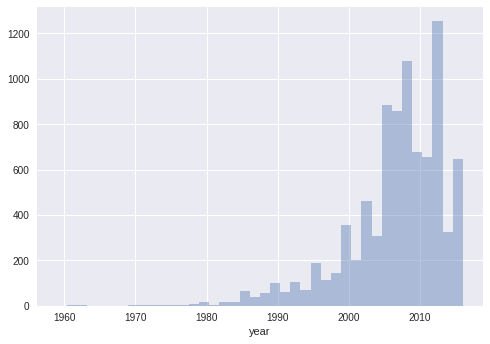

In [19]:
#Distribution Plot 
vis1 = sns.distplot(car_ads_no_missing.year, bins=40, kde=False)

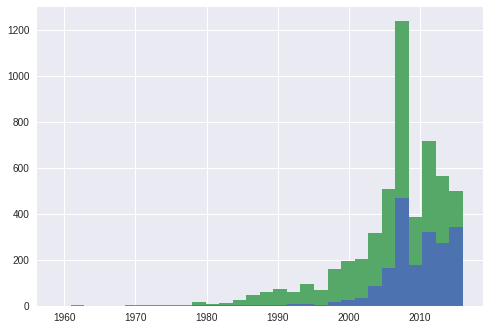

In [20]:
plt.hist([car_ads_no_missing[car_ads_no_missing.body == 'crossover'].year,
                     car_ads_no_missing[car_ads_no_missing.body == 'sedan'].year], 
                    stacked=True,
                    bins=30
        )
plt.show()

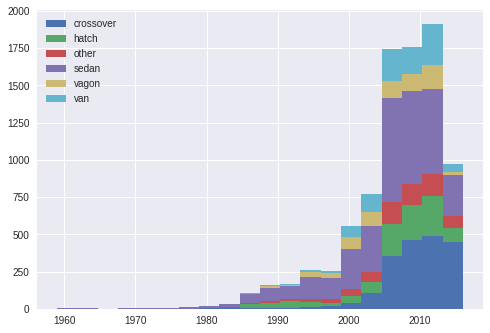

In [21]:
list1 = list()
for carbody in car_ads_no_missing.body.cat.categories:
    list1.append(car_ads_no_missing[car_ads_no_missing.body == carbody].year)

mylabels = list()
for carbody in car_ads_no_missing.body.cat.categories:
    mylabels.append(carbody)
    
plt.hist(list1,
         stacked=True,
         bins=20,
        rwidth=1,
        label=mylabels
        )
plt.legend()
plt.show()

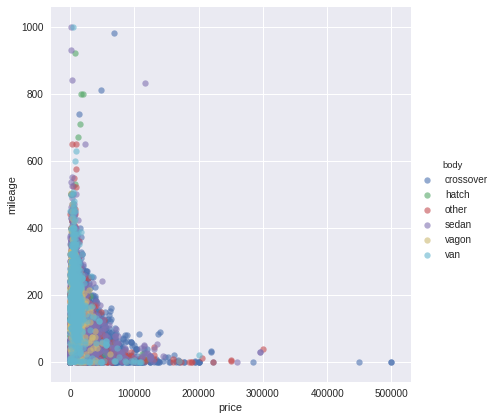

In [22]:
# Linear Model Plot
vis3 = sns.lmplot(data=car_ads_no_missing[car_ads_no_missing['price']<500000], 
                  x="price",
                  y="mileage",
                  fit_reg=False,
                  hue = 'body',
                  size=6,
                  scatter_kws={"alpha":0.6, "s":40}
       )

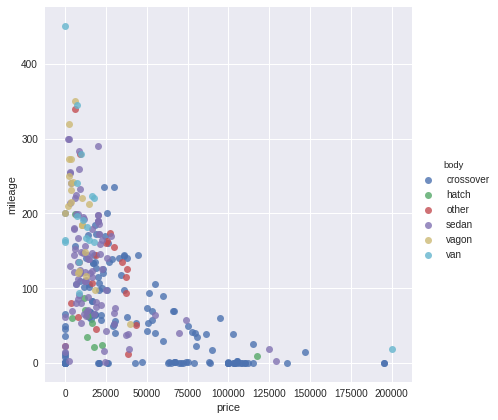

In [23]:
#marker size
vis3 = sns.lmplot(data=car_ads_no_missing[car_ads_no_missing['price']<500000].head(300), 
                  x="price",
                  y="mileage",
                  fit_reg=False,
                  hue = 'body',
                  size=6
          
         )

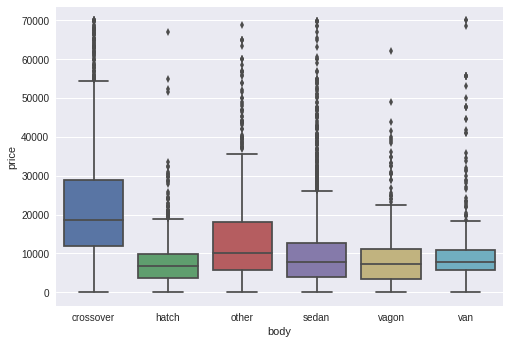

In [24]:
#Boxplots
vis2 = sns.boxplot(
    data=car_ads_no_missing[car_ads_no_missing['price']<70000], 
    x="body", 
    y = "price"
)

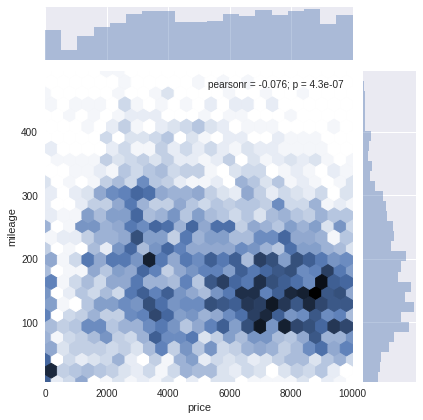

In [25]:
#jointplots

j = sns.jointplot(data = car_ads_no_missing[
    (car_ads_no_missing.price<10000) &
    (car_ads_no_missing.mileage<500) &
    (car_ads_no_missing.mileage>5)
    ], 
     kind='hex',
     #size=20,
     x='price' , 
     y='mileage')


#Jointplots gives more meaning, 
#if they are plotted between two variables which 
#have similar units
#like Audience rating vs Critic rating

## Linear Model Plot in Seaborn
sns.lmplot('x', 'y', data=df, fit_reg=False)


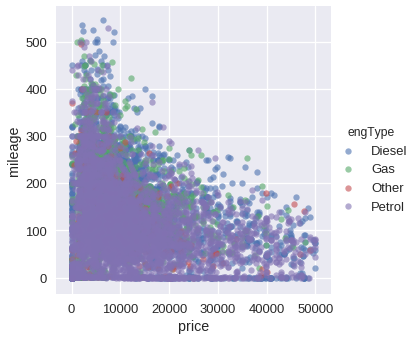

In [26]:
data_subset = car_ads_no_missing[(car_ads_no_missing.mileage<550)
                                & (car_ads_no_missing.price<50000)]
sns.set_context("talk")
sns.lmplot(y='mileage', x='price', data = data_subset, fit_reg=False, hue='engType', 
           scatter_kws={"alpha":0.6, "s":40})
plt.show()


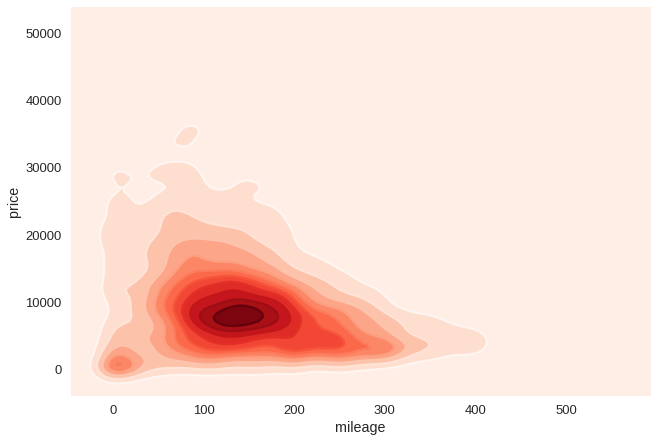

In [27]:

k1 = sns.kdeplot(
            data_subset.mileage, 
            data_subset.price,
           
            #shade_lowest=False,
            shade=True,
            cmap='Reds'
)


k1b = sns.kdeplot(
            data_subset.mileage, 
            data_subset.price,
           
            #shade_lowest=False,
            #shade=True,
            cmap='Reds'
)

#tip = overlappinng to make it look smoother

In [28]:
#Working with Subplots

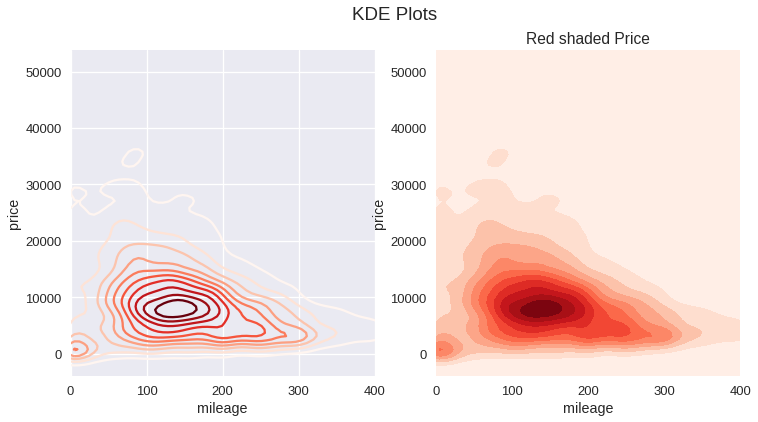

In [29]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)

f1 = sns.kdeplot(
            data_subset.mileage, 
            data_subset.price,
           
            #shade_lowest=False,
            #shade=True,
            cmap='Reds',
            ax = axes[0]
)
f1.set(xlim=(0,400))

f2 = sns.kdeplot(
            data_subset.mileage, 
            data_subset.price,
           
            #shade_lowest=False,
            shade=True,
            cmap='Reds',
            ax = axes[1]
)
f2.set_title("Red shaded Price")
sns.plt.suptitle('KDE Plots')


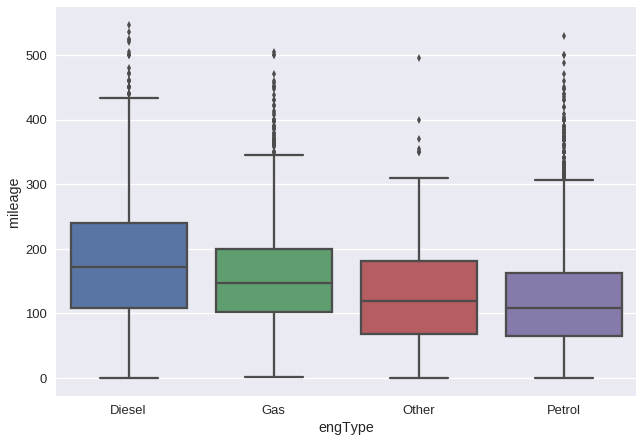

In [30]:
w = sns.boxplot(
            x=data_subset.engType, 
            y=data_subset.mileage
)

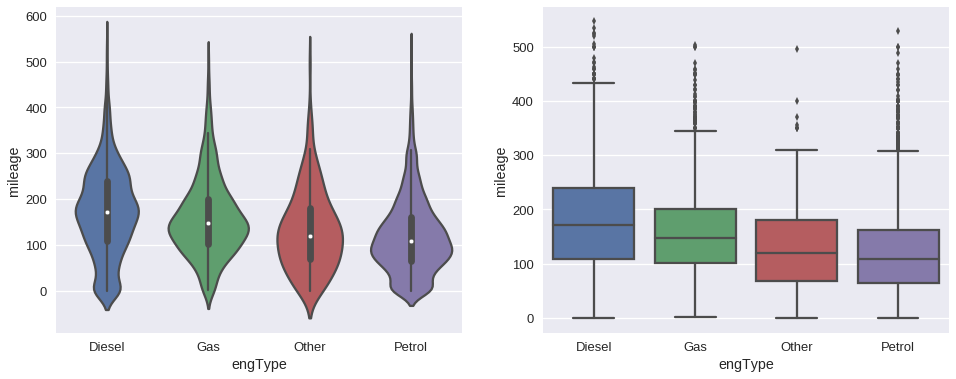

In [31]:
f, axs = plt.subplots(1,2, figsize=(16,6))


f1 = sns.violinplot(
            y=data_subset.mileage, 
            x=data_subset.engType, ax=axs[0]
)
f2 = sns.boxplot(
            y=data_subset.mileage, 
            x=data_subset.engType, ax=axs[1]
)

In [32]:
car_ads_no_missing.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

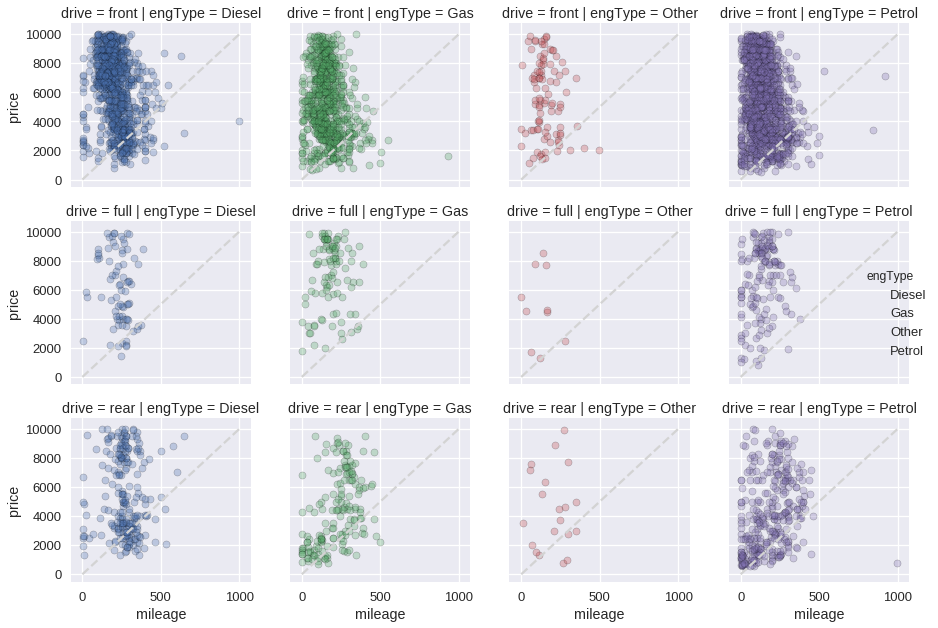

In [33]:
#Creating a facet Grid
# Creating coordinates and diagonals
g = sns.FacetGrid(car_ads_no_missing[
    (car_ads_no_missing.price<10000) & (car_ads_no_missing.price>500)], 
                  col='engType', 
                  row ='drive', 
                  hue='engType')
kws = dict(s=50, linewidth=0.5, edgecolor='black', alpha=0.3)

for ax in g.axes.flat:
       ax.plot((0, 1000), (0, 10000), ls="--", c="lightgray")
g.add_legend()                
g = g.map(plt.scatter, 
          'mileage','price',  **kws)

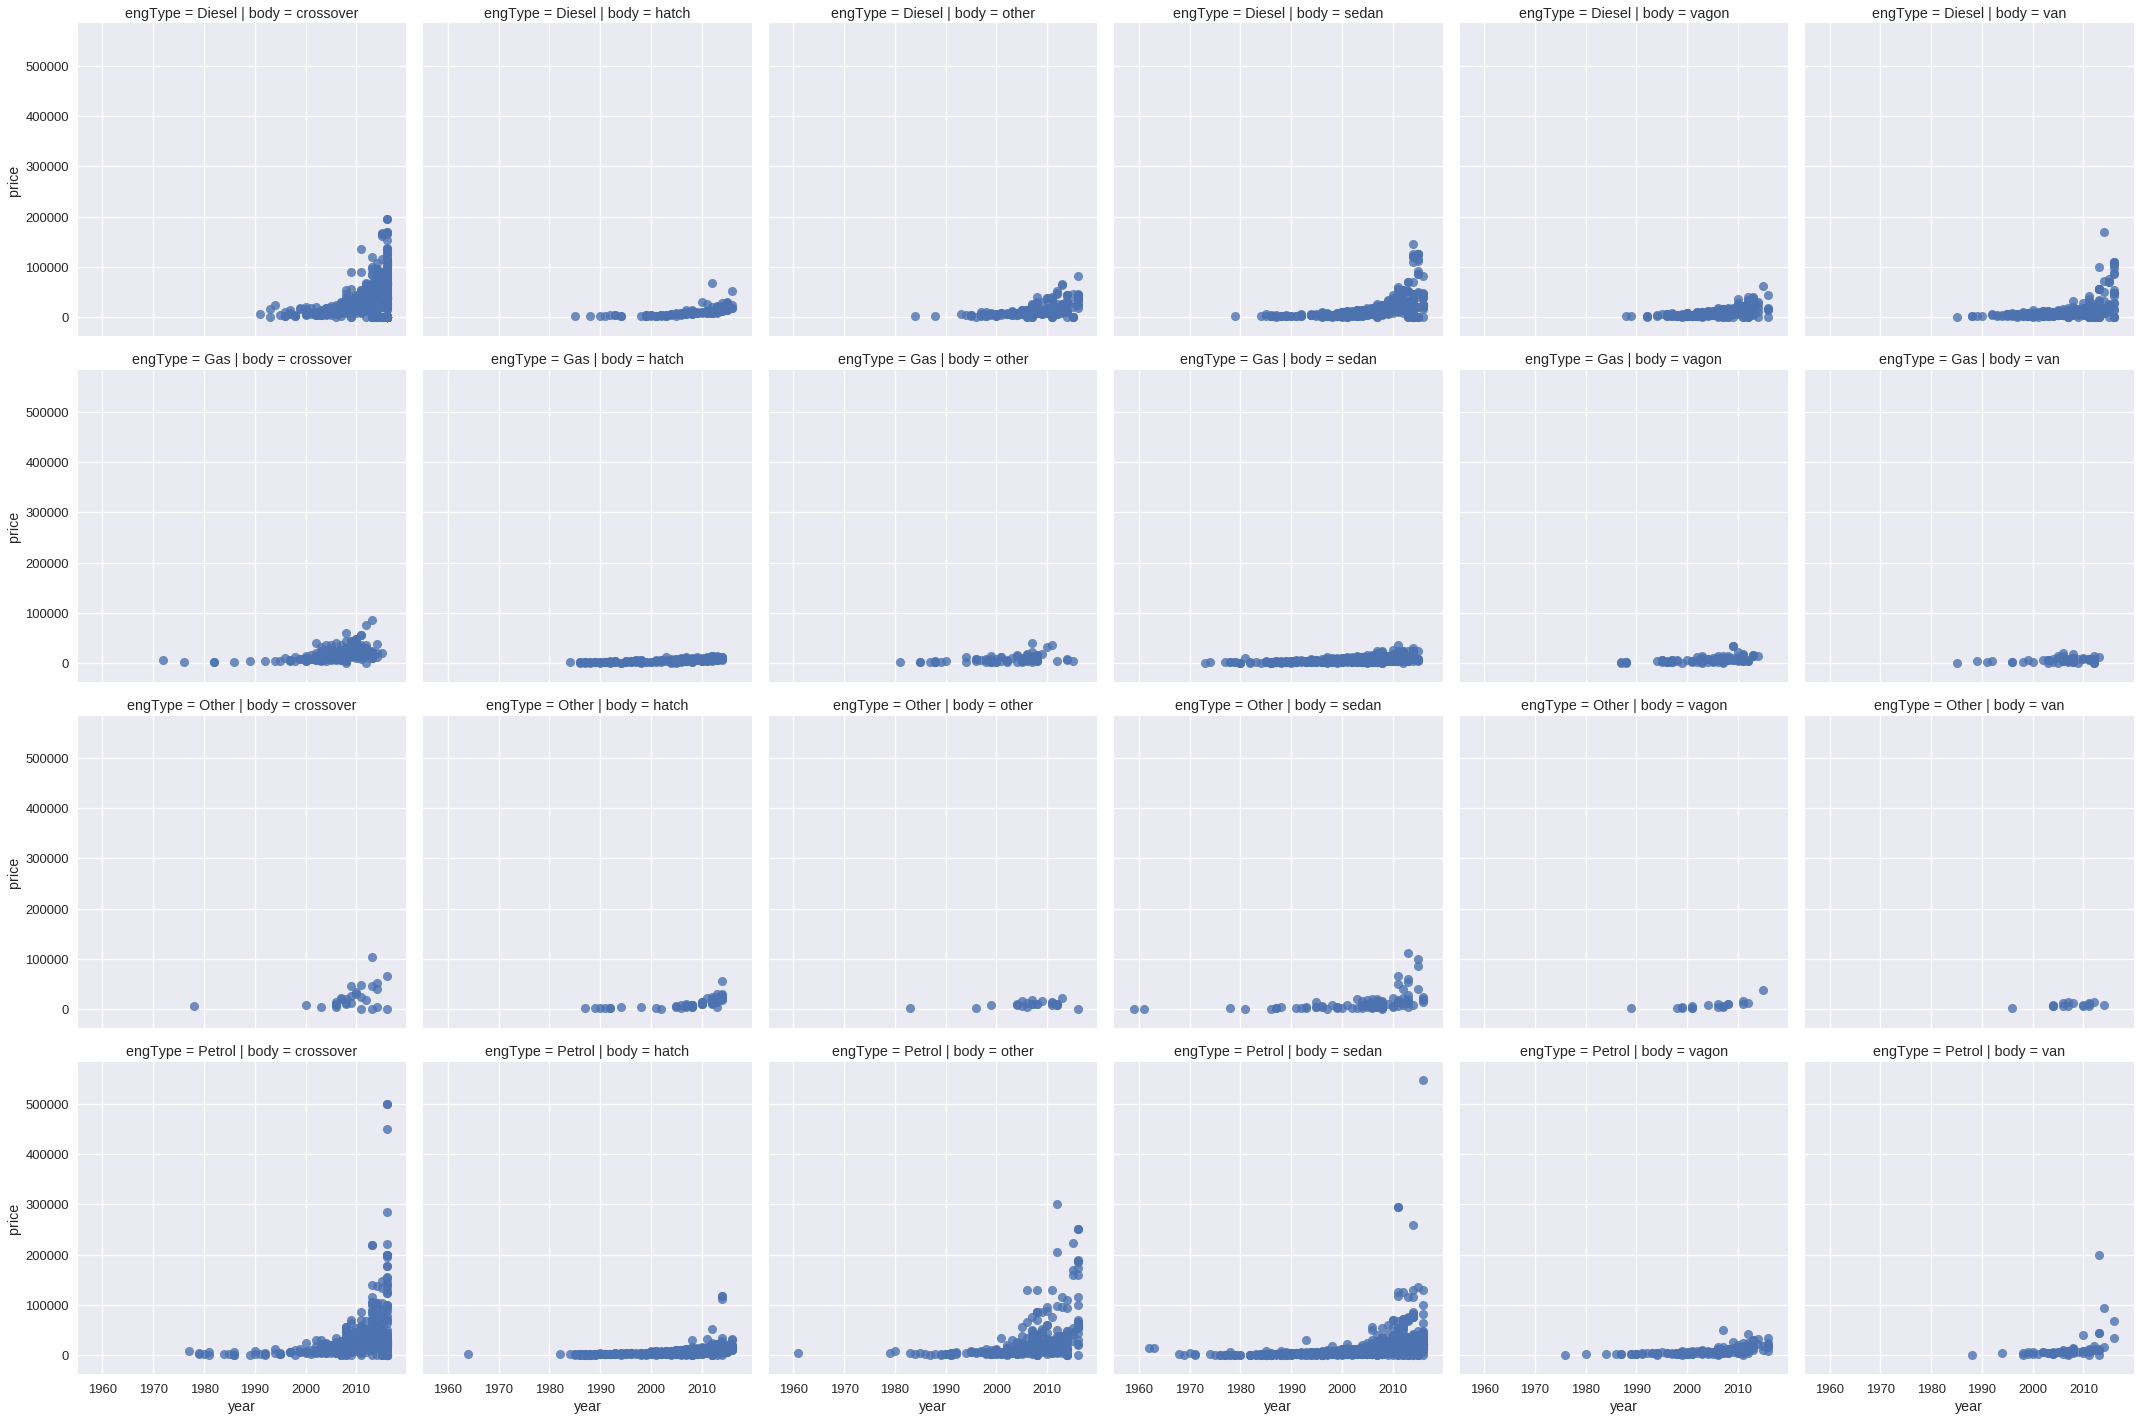

In [34]:
#With Different plots using col="Name" or rows="Name"
sns.lmplot(x='year', y='price', data = car_ads_no_missing, col='body', row='engType', fit_reg=False)
plt.show()

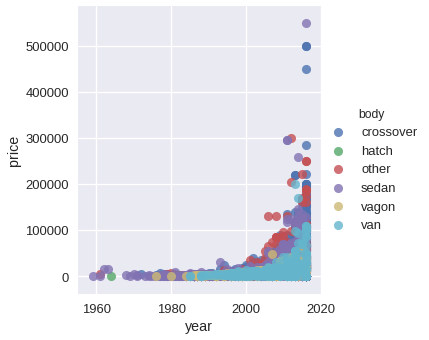

In [35]:
#With Different plots using hue="columnName"
sns.lmplot(x='year', y='price', data = car_ads_no_missing, hue='body', fit_reg=False)
plt.show()

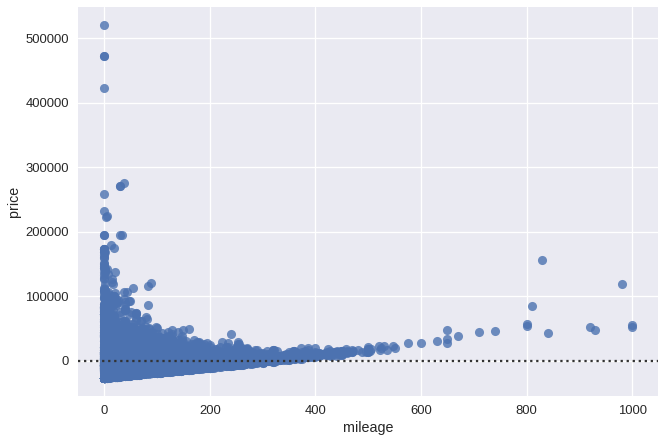

In [36]:
sns.residplot(x='mileage', y='price', data = car_ads_no_missing)
plt.show()

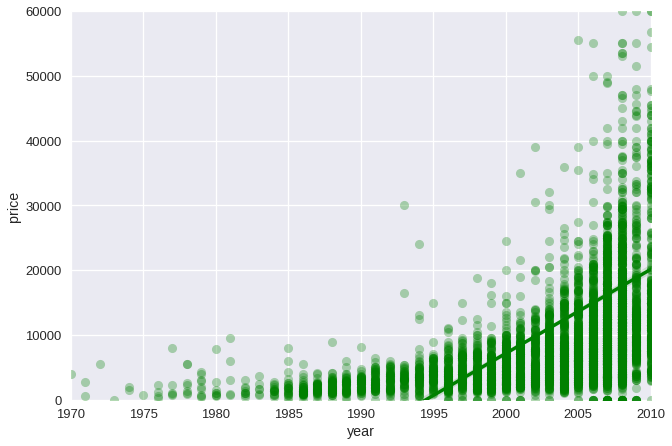

In [37]:
#With Different plots using hue="columnName"
#g = sns.regplot(x='year', y='price', data = car_ads_no_missing, color='red')

g = sns.regplot(x='year', y='price', data = car_ads_no_missing,   color='green', scatter_kws={"alpha":0.3})
g.set(xlim=(1970,2010), ylim=(0,60000))



sns.despine()

plt.show()

In [38]:
### STyling Dashboards
car_ads_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8739 entries, 0 to 9575
Data columns (total 10 columns):
car             8739 non-null category
price           8739 non-null float64
body            8739 non-null category
mileage         8739 non-null int64
engV            8739 non-null float64
engType         8739 non-null category
registration    8739 non-null category
year            8739 non-null int64
model           8739 non-null category
drive           8739 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 408.6 KB


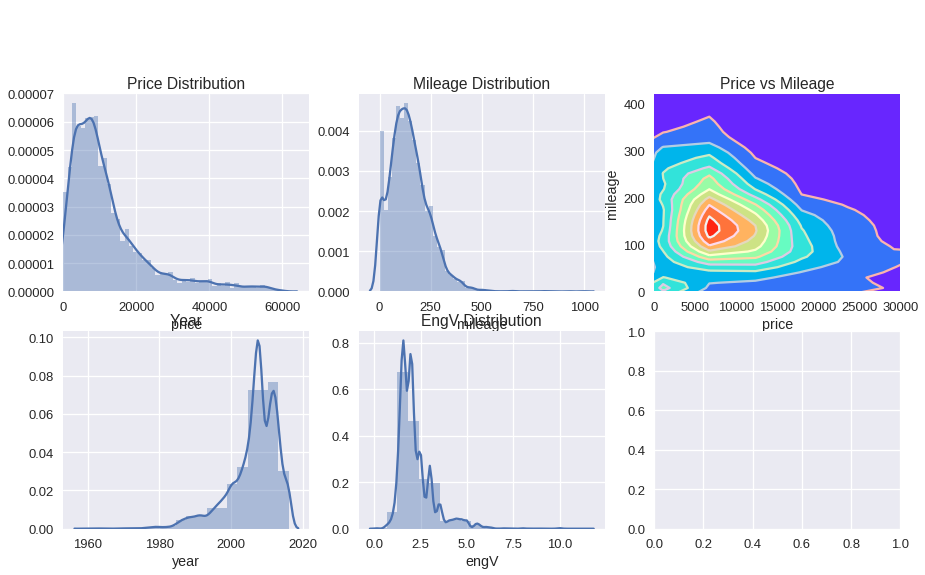

In [39]:
fn, axes = plt.subplots(2,3, figsize=(15,8))
p1 = sns.distplot(car_ads_no_missing[car_ads_no_missing.price<60000].price,  ax=axes[0,0])
p1.set_title("\n\n\n\nPrice Distribution")
p1.set_xlim(0)
p2 = sns.distplot(car_ads_no_missing[car_ads_no_missing.price<60000].mileage, ax=axes[0,1])
p2.set_title("\n\n\n\nMileage Distribution")

p3 = sns.kdeplot(car_ads_no_missing.price,  
                 car_ads_no_missing.mileage,                    
                 ax=axes[0,2],
                shade=True,
                 cmap='rainbow'
                )

p3 = sns.kdeplot(car_ads_no_missing.price,  
                 car_ads_no_missing.mileage,                    
                 ax=axes[0,2],
                shade=False,
                 cmap='Pastel1'
                )
p3.set_title("\n\n\n\nPrice vs Mileage")
p3.set_xlim(0,30000)
p3.set_ylim(0,420)



p5 = sns.distplot(car_ads_no_missing[(car_ads_no_missing.price<60000) & (car_ads_no_missing.year>1940)].year, bins=20, ax=axes[1,0])
p5.set_title("\n\n\n\nYear")
p6 = sns.distplot(car_ads_no_missing[(car_ads_no_missing.price<60000) & (car_ads_no_missing.engV<12)].engV, bins=20, ax=axes[1,1])
p6.set_title("\n\n\n\nEngV Distribution")

plt.show()

In [40]:
car_ads_no_missing.head()
car_subset = car_ads_no_missing[['price','engType','body']]
car_subset.head()

,price,engType,body
0,15500.0,Gas,crossover
1,20500.0,Gas,sedan
2,35000.0,Petrol,other
3,17800.0,Diesel,van
5,16600.0,Petrol,crossover


In [41]:
##Another way
car_subset1 = car_ads_no_missing.ix[:,['price','engType','body']]
car_subset1.head()

,price,engType,body
0,15500.0,Gas,crossover
1,20500.0,Gas,sedan
2,35000.0,Petrol,other
3,17800.0,Diesel,van
5,16600.0,Petrol,crossover


## Heatmap using Matplotlib

In [42]:
car_gp = car_subset.groupby(by=['body','engType']).median()
car_gp

price
body      engType         
crossover Diesel   26400.0
          Gas      15900.0
          Other    17500.0
          Petrol   19000.0
hatch     Diesel    9000.0
          Gas       4950.0
          Other     9250.0
          Petrol    6994.5
other     Diesel   10299.0
          Gas       6200.0
          Other    10200.0
          Petrol   12600.0
sedan     Diesel    8999.5
          Gas       6400.0
          Other     7950.0
          Petrol    8500.0
vagon     Diesel    7850.0
          Gas       6500.0
          Other     6500.0
          Petrol    7000.0
van       Diesel    8275.0
          Gas       5999.0
          Other     7600.0
          Petrol    6500.0

In [43]:
car_gp_rs = car_gp.reset_index()
car_gp_rs.head(5)

,body,engType,price
0,crossover,Diesel,26400.0
1,crossover,Gas,15900.0
2,crossover,Other,17500.0
3,crossover,Petrol,19000.0
4,hatch,Diesel,9000.0


In [44]:
car_pivot = car_gp_rs.pivot(index='body',columns='engType',values='price')
car_pivot

engType,Diesel,Gas,Other,Petrol
body,,,,
crossover,26400.0,15900.0,17500.0,19000.0
hatch,9000.0,4950.0,9250.0,6994.5
other,10299.0,6200.0,10200.0,12600.0
sedan,8999.5,6400.0,7950.0,8500.0
vagon,7850.0,6500.0,6500.0,7000.0
van,8275.0,5999.0,7600.0,6500.0


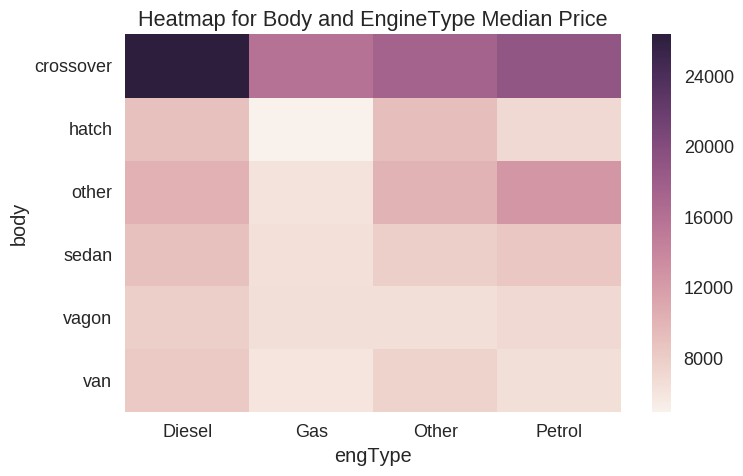

In [45]:
fig = plt.figure(figsize=(8, 5), dpi=100)
s = sns.heatmap(car_pivot)
s.set_title("Heatmap for Body and EngineType Median Price")
plt.show()

